In [55]:
import numpy as np
from scipy.stats import *
import random 
import matplotlib.pyplot as plt

In [56]:
#we could either have drift be calculated in the fucntion or ask the user to provide values for r and d beforehand
initial_stock_price = 120.00
volatility = 0.2
drift = 0.3

time_increment = 1
num_steps = 365
time_step = time_increment/num_steps

simulation_length = 365 * 2
price_paths = 500

#some models include a parameter for diffusion, which counts for shorter-term fluctuations

#create a brownian process for each step
def brownian_motion(time_step, volatility, drift, simulation_length, price_paths):
    brown = volatility * np.random.normal(0, np.sqrt(time_step), size = (simulation_length, price_paths))
    step_value =  np.exp(brown + (drift - volatility ** 2/2) * time_step)
    return step_value

#create final possible price paths 
def brownian_steps(time_step, volatility, drift, initial_stock_price, simulation_length, price_paths):
    brownian_returns = brownian_motion(time_step, volatility, drift, simulation_length, price_paths)
    steps = np.vstack([np.ones(price_paths), brownian_returns])
    step_values = initial_stock_price * steps.cumprod(axis=0)
    return step_values

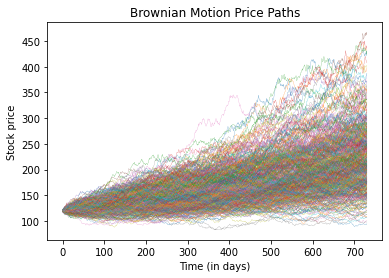

In [57]:
#graph results
possible_paths = brownian_steps(time_step, volatility, drift, initial_stock_price, simulation_length, price_paths)
plt.plot(possible_paths, linewidth = 0.2)
plt.title("Brownian Motion Price Paths")
plt.xlabel("Time (in days)")
plt.ylabel("Stock price")
plt.show()
